# Which college district has the fewest low-income families?

> * 🔬 Data Science
* 🥠 Statistics
* 👟 Ready To Run!

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span><ul class="toc-item"><li><span><a href="#Doing-well-by-doing-good" data-toc-modified-id="Doing-well-by-doing-good-1.1">Doing well by doing good</a></span></li><li><span><a href="#Starting-small" data-toc-modified-id="Starting-small-1.2">Starting small</a></span></li></ul></li><li><span><a href="#Connect-to-your-GIS" data-toc-modified-id="Connect-to-your-GIS-2">Connect to your GIS</a></span></li><li><span><a href="#Find-the-community-college-district-with-the-fewest-low-income-families" data-toc-modified-id="Find-the-community-college-district-with-the-fewest-low-income-families-3">Find the community college district with the fewest low income families</a></span></li><li><span><a href="#Get-the-number-of-low-income-households-in-each-district" data-toc-modified-id="Get-the-number-of-low-income-households-in-each-district-4">Get the number of low-income households in each district</a></span></li><li><span><a href="#Visualization-to-show-district-with-fewest-households" data-toc-modified-id="Visualization-to-show-district-with-fewest-households-5">Visualization to show district with fewest households</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6">Conclusion</a></span></li></ul></div>

## Introduction

### Doing well by doing good
A local cable provider has been running a pilot program in the county to provide low-cost computers and internet access to low-income families with kids in high school. There has been a marked improvement in school performance for these kids, and the program has brought the company a fair amount of positive publicity and goodwill in the community.

Company officials are now considering setting up a similar program for community college students. The company provides internet access to the five community college districts in the county, and officials are aware that the colleges are under a lot of pressure—they are facing funding cuts at the same time as increased demand for enrollment. To try to improve the situation the colleges are turning more and more to distance learning, primarily via the internet. By providing computers and internet access, the cable company can enable more low-income students to take advantage of online classes.

### Starting small
The company wants to start with a small pilot program in one district. To be fair they will have to offer the low-cost computers and internet access to any low-income students in the district—if they pick a district with many such students the program may be overwhelmed from the start. So they will set up the pilot program in the district that has the fewest low-income households.
The program is run out of the company's marketing division, so an analyst in that division is tasked with finding out which district has the fewest low-income families. To do the analysis, he'll use ArcGIS to sum the number of low-income families in census tracts that fall within each district.

Note:
This example presents an approach to using ArcGIS to find out how many low-income families are within each community college district. While the data is real, the scenario, analysis, and resulting decisions are hypothetical. The purpose of the example is to illustrate the type of problem that can be addressed by summarizing information by area features.

## Connect to your GIS

Establish a connection to your organization which could be an ArcGIS Online organization or an ArcGIS Enterprise. To be able to run the code using ArcGIS API for Python, you would need to provide credentials of a user within an ArcGIS Online organization.

In [1]:
from arcgis.gis import GIS
import pandas as pd

In [5]:
gis = GIS("https://geosaurus.maps.arcgis.com", "arcgis_python", "P@ssword123", profile="online_online_profile")

Search the data and begin performing the analysis

Accessing the content property of your gis object you can use the search() method. Search for **CensusTractIncome**.

Search for **Community_College_dist**

In [6]:
data = gis.content.search('CommunityCollege_CensusTracts owner: api_data_owner', 'Feature layer')


Import the display module to display the items

<Item title:"CommunityCollege_CensusTracts" type:Feature Layer Collection owner:api_data_owner>
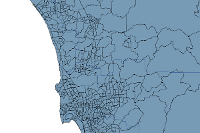

In [7]:
from IPython.display import display

for item in data:
    display(item)

In [10]:
item = data[0]

In [11]:
for lyr in item.layers:
    print(lyr.properties.name)

census_tract_income
Community_College_Dist


Since the item is a Feature Layer Collection, accessing the layers property will give us a list of FeatureLayer objects.

In [11]:
inc_lyr = item.layers[0]
dis_lyr = item.layers[1] 


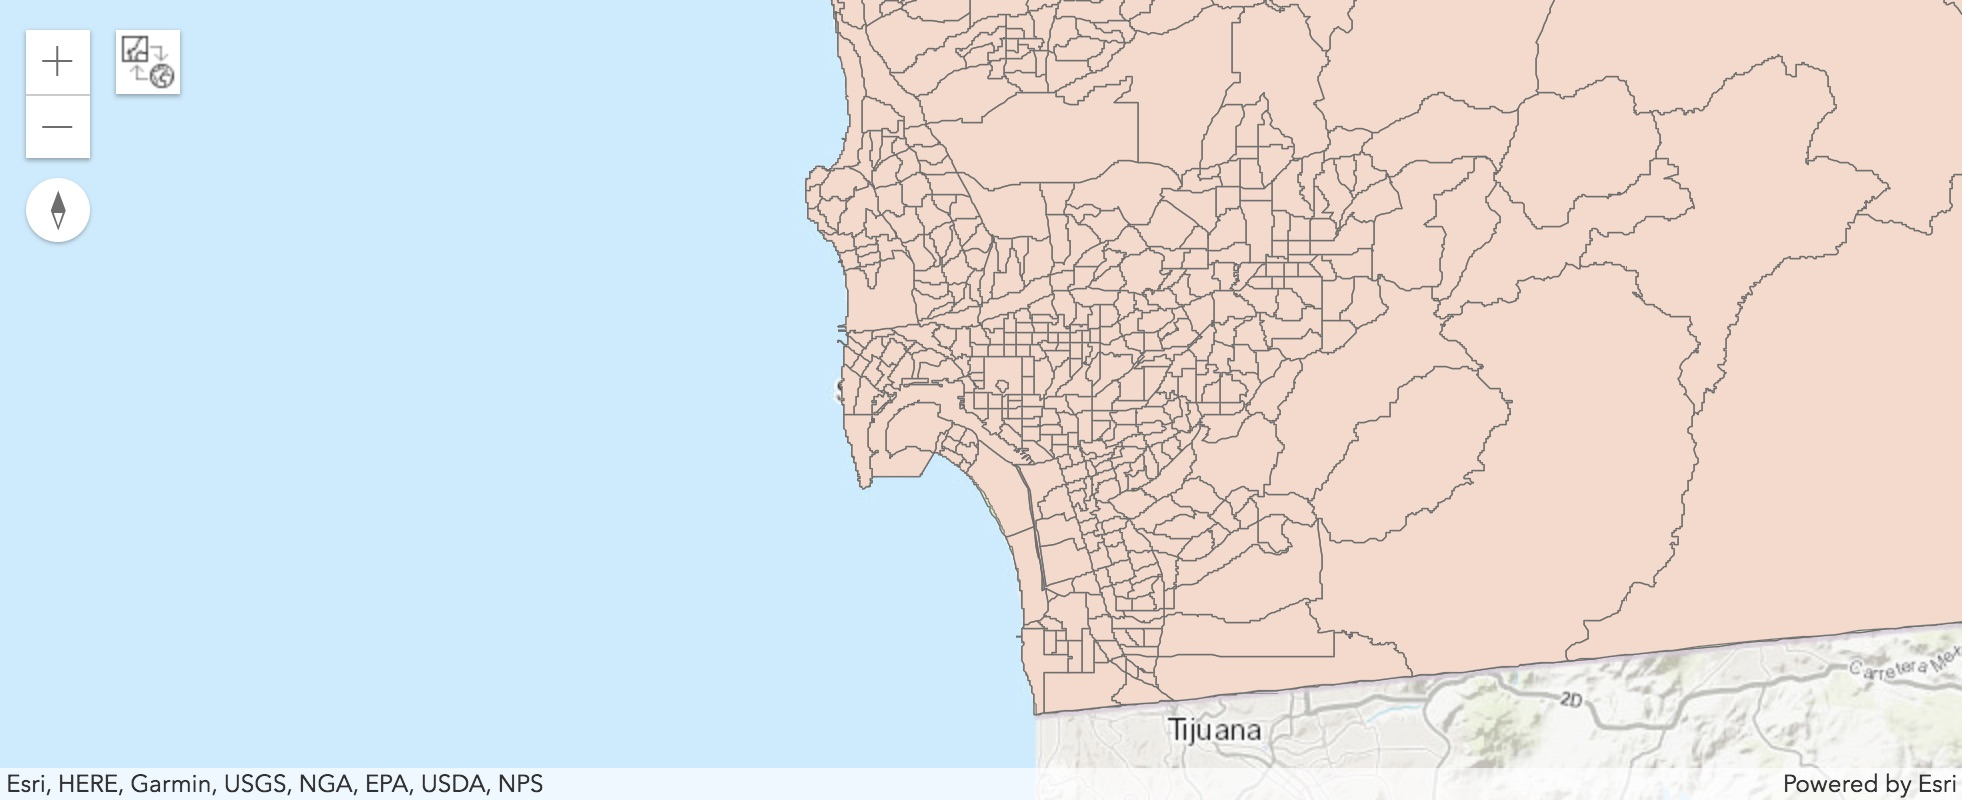

In [24]:
m1 = gis.map('San Diego')
m1

In [13]:
m1.add_layer(dis_lyr)
m1.add_layer(inc_lyr)

## Find the community college district with the fewest low income families


From the regional association of governments GIS database, the analyst loads a layer of the community college district boundaries and a layer of census tracts. The census tract data includes the number of households in each of several income categories, such as less than $10,000, $10,000 to $15,000, $15,000 to $20,000, and so on.

The standard the company has been using for the high school program is to provide support to families with an annual income less than $30,000.

They will use this same standard for the community college program.The analyst adds a field to the census tract layer and sums the number of households in each tract with income less than $30,000.

Convert the layer into pandas dataframe to calculate the number of households in each tract with less than $30,000.

In [14]:
sdf = pd.DataFrame.spatial.from_layer(inc_lyr)

In [15]:
sdf.head()

,SHAPE,fid,income_100,income_10k,income_125,income_150,income_15k,income_200,income_20k,income_25k,income_30k,income_35k,income_40k,income_45k,income_50k,income_60k,income_75k,income_all,income_les,tract
0,"{""rings"": [[[-13051046.674600001, 3866695.3332...",1,379,205,73,127,158,125,195,229,279,278,212,304,445,526,370,4148,243,7700
1,"{""rings"": [[[-13049196.649199996, 3869830.7043...",2,107,132,64,52,180,9,160,135,250,116,175,115,280,263,178,2510,294,7800
2,"{""rings"": [[[-13051806.579200003, 3868598.5098...",3,150,156,49,42,154,25,191,209,233,168,197,188,325,393,233,2953,240,7901
3,"{""rings"": [[[-13050375.521200001, 3868973.9773...",4,124,163,30,43,184,19,174,171,139,195,147,143,288,145,310,2429,154,7903
4,"{""rings"": [[[-13050786.626600001, 3868042.6255...",5,162,219,53,67,187,19,208,218,199,188,184,172,304,316,326,3157,335,7904


In [16]:
sdf['income_lt_30k'] = sdf['income_les']+sdf['income_10k']+sdf['income_15k']+sdf['income_20k']+sdf['income_25k']

In [17]:
sdf.income_lt_30k.head()

0    1030
1     901
2     950
3     846
4    1167
Name: income_lt_30k, dtype: int64

In [18]:
sdf.head()

,SHAPE,fid,income_100,income_10k,income_125,income_150,income_15k,income_200,income_20k,income_25k,...,income_35k,income_40k,income_45k,income_50k,income_60k,income_75k,income_all,income_les,tract,income_lt_30k
0,"{""rings"": [[[-13051046.674600001, 3866695.3332...",1,379,205,73,127,158,125,195,229,...,278,212,304,445,526,370,4148,243,7700,1030
1,"{""rings"": [[[-13049196.649199996, 3869830.7043...",2,107,132,64,52,180,9,160,135,...,116,175,115,280,263,178,2510,294,7800,901
2,"{""rings"": [[[-13051806.579200003, 3868598.5098...",3,150,156,49,42,154,25,191,209,...,168,197,188,325,393,233,2953,240,7901,950
3,"{""rings"": [[[-13050375.521200001, 3868973.9773...",4,124,163,30,43,184,19,174,171,...,195,147,143,288,145,310,2429,154,7903,846
4,"{""rings"": [[[-13050786.626600001, 3868042.6255...",5,162,219,53,67,187,19,208,218,...,188,184,172,304,316,326,3157,335,7904,1167


In [19]:
sdf.shape

(605, 21)

In [20]:
cols = sdf.columns.tolist()

In [21]:
cols = cols[-1:] + cols[:-1]

In [22]:
df = sdf[cols]

In [23]:
df.head()

,income_lt_30k,SHAPE,fid,income_100,income_10k,income_125,income_150,income_15k,income_200,income_20k,...,income_30k,income_35k,income_40k,income_45k,income_50k,income_60k,income_75k,income_all,income_les,tract
0,1030,"{""rings"": [[[-13051046.674600001, 3866695.3332...",1,379,205,73,127,158,125,195,...,279,278,212,304,445,526,370,4148,243,7700
1,901,"{""rings"": [[[-13049196.649199996, 3869830.7043...",2,107,132,64,52,180,9,160,...,250,116,175,115,280,263,178,2510,294,7800
2,950,"{""rings"": [[[-13051806.579200003, 3868598.5098...",3,150,156,49,42,154,25,191,...,233,168,197,188,325,393,233,2953,240,7901
3,846,"{""rings"": [[[-13050375.521200001, 3868973.9773...",4,124,163,30,43,184,19,174,...,139,195,147,143,288,145,310,2429,154,7903
4,1167,"{""rings"": [[[-13050786.626600001, 3868042.6255...",5,162,219,53,67,187,19,208,...,199,188,184,172,304,316,326,3157,335,7904


Importing the spatial dataframe back into a layer, Accessing the content property of your gis object you can use the `import_data()` method.

In [49]:
census_tract = gis.content.import_data(df, title='census_tract2', tags='censustrack')

In [51]:
census_tract

<Item title:"census_tract2" type:Feature Layer Collection owner:yjiang>

## Get the number of low-income households in each district

The analyst then summarizes census tracts by community college districts to sum the number of low-income households in each district. If a tract falls in two or more districts, the value for that tract will be split proportionally between the districts (based on the area of the tract in each district).

In [52]:
from arcgis.features.summarize_data import summarize_within

In [53]:
summary = summarize_within(dis_lyr, census_tract, summary_fields=["income_lt_ SUM"],
                 shape_units='SquareMiles', output_name='district_summary')

In [54]:
summary

<Item title:"district_summary" type:Feature Layer Collection owner:yjiang>


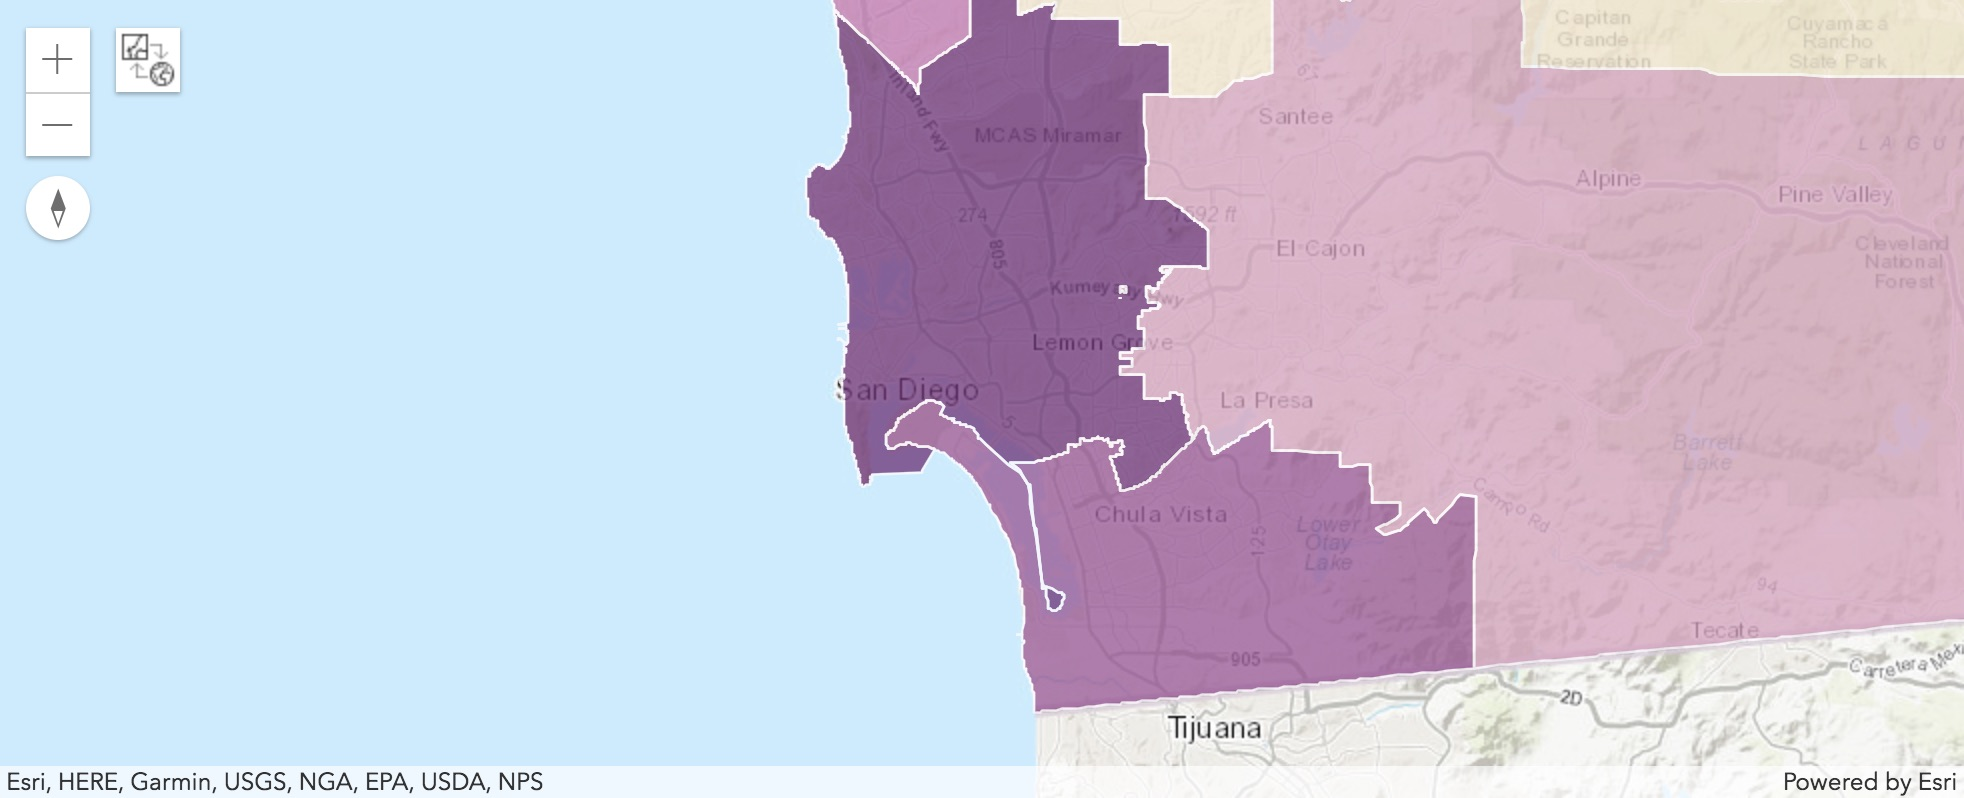

In [66]:
m2 = gis.map('San Diego')
m2

The map displays the census tracts color-coded by the number of households in each census tract with income less than $30,000 per year.

In [56]:
m2.add_layer(summary)

In [57]:
summ_lyr = summary.layers[0]

In [60]:
sdf2 = pd.DataFrame.spatial.from_layer(summ_lyr)
cols2 = sdf2.columns.tolist()
cols2

['SHAPE',
 'analysisarea',
 'district',
 'objectid',
 'objectid_1',
 'shape__are',
 'shape__len',
 'shape_leng',
 'sum_area_squaremiles',
 'sum_income_lt_']

In [61]:
sdf2.sort_values(['sum_income_lt_'], inplace=True)

In [62]:
sdf2.head()

,SHAPE,analysisarea,district,objectid,objectid_1,shape__are,shape__len,shape_leng,sum_area_squaremiles,sum_income_lt_
2,"{""rings"": [[[-13069560.232299998, 3941041.6564...",180.057307,MIRA COSTA COMMUNITY COLLEGE,3,3,6.666802e+08,193041.705158,5.292542e+05,179.904967,28288.0
4,"{""rings"": [[[-13045570.419099998, 3857253.9374...",171.343530,SOUTHWESTERN COMMUNITY COLLEGE,5,5,6.272847e+08,175596.854611,4.845452e+05,171.085801,40861.0
0,"{""rings"": [[[-13000869.2404, 3890488.430200003...",1137.329793,GROSSMONT-CUYAMACA COMMUNITY COLLEGE,1,1,4.176966e+09,349055.694465,9.623860e+05,1137.093733,48777.0
1,"{""rings"": [[[-13078663.771200003, 3962536.5573...",2554.787820,PALOMAR COMMUNITY COLLEGE,2,2,9.475183e+09,560765.010295,1.538205e+06,2554.695554,56549.0
3,"{""rings"": [[[-13039483.616799999, 3888486.6244...",217.585900,SAN DIEGO COMMUNITY COLLEGE,4,4,7.999274e+08,221005.474787,6.086365e+05,217.566586,127843.0


This shows that one of the community college districts has by far the fewest households with income less than $30,000—this district will be used for the cable provider's pilot program. The values were calculated by summing the values for the tracts within each community college district.

## Visualization to show district with fewest households


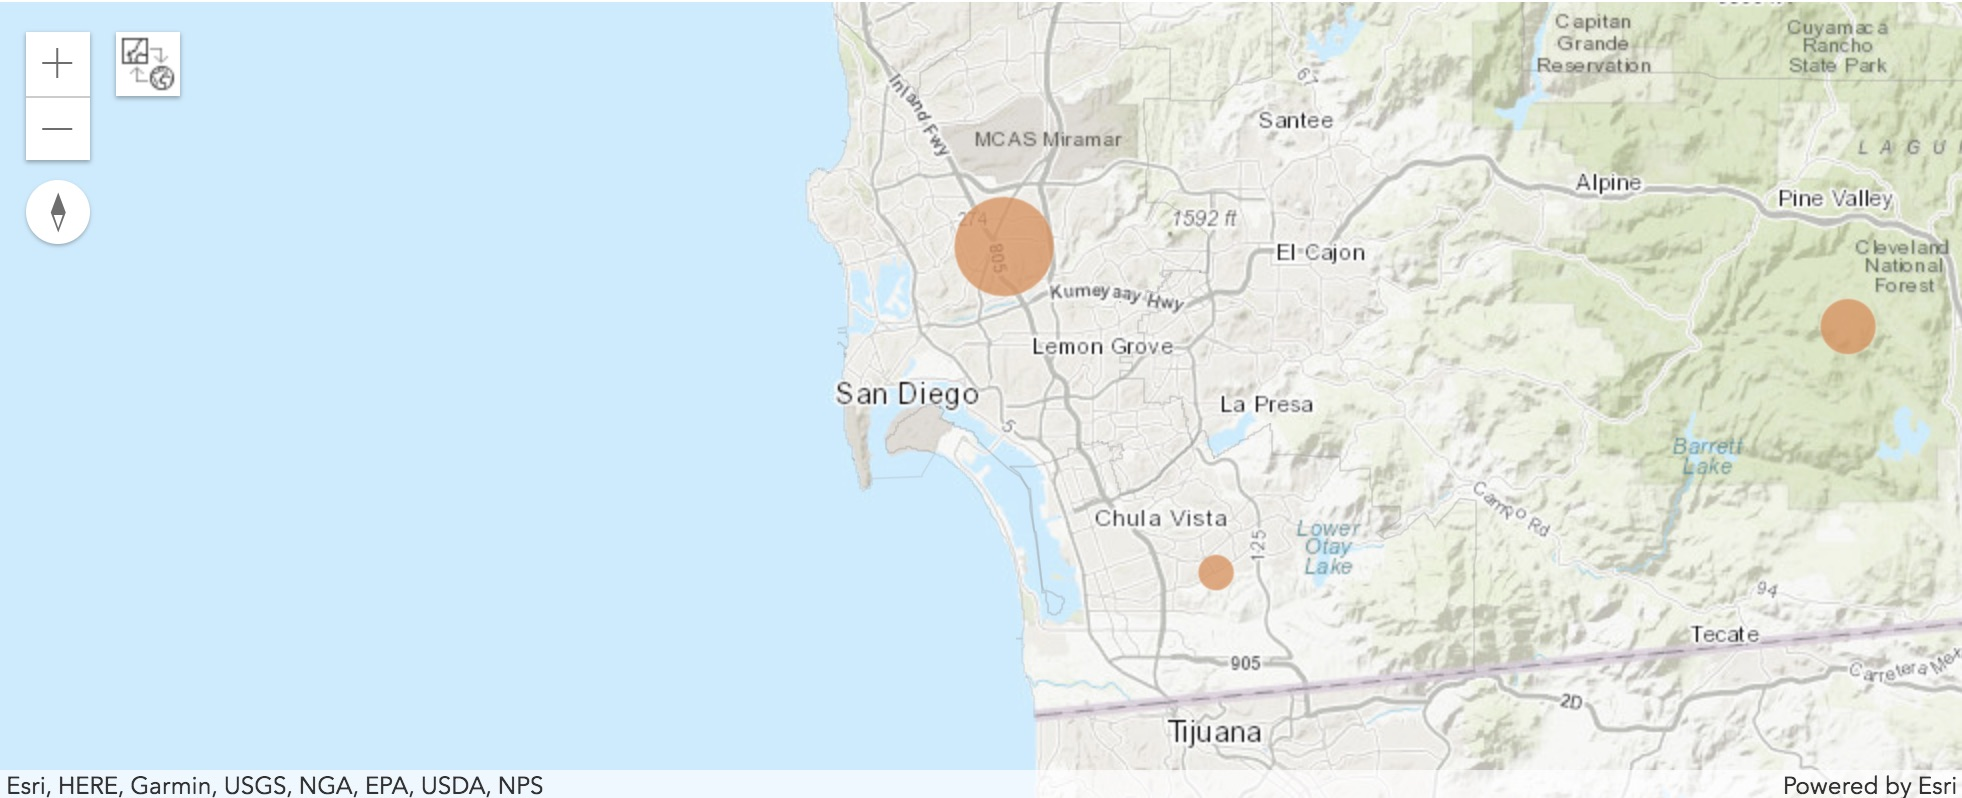

In [67]:
m3 = gis.map('San Diego')
m3

In [64]:
m3.add_layer(summary, {"renderer":"ClassedSizeRenderer", "field_name": "SUM_income_lt_"})

It's clear that the Mira Costa district has by far the fewest low-income households. That's where the pilot program will be set up.

## Conclusion
In this notebook, we have discussed how to examine, summarize, and visualize which college district has the fewest low income families with spatially enabled dataframe and spatial analysis.